<a href="https://colab.research.google.com/github/dayvvid/gsb521_w23_final_project/blob/main/Snap_DAU_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID Impact on Snap DAU

We are on the growth team at Snapchat when COVID hits. Management wants to set proper expectations for what growth will look like in the coming quarters as a result of the pandemic.

The Data:

In [25]:
import pandas as pd

snap = pd.read_csv("usage_pre_covid_nordic.csv")

In [26]:
snap

,event_date,country,age,top_device,gender,APP_APPLICATION_OPEN_UU,APP_APPLICATION_OPEN_COUNT,DIRECT_SNAP_CREATE_UU,DIRECT_SNAP_CREATE_COUNT,DIRECT_SNAP_SEND_UU,DIRECT_SNAP_SEND_COUNT,STORY_SNAP_POST_UU,STORY_SNAP_POST_COUNT
0,2019-09-11,DK,2018.0,Android,female,287,6012,213,4093,195,3029,13,24
1,2019-03-29,SE,2018.0,Android,male,2515,87650,2033,63670,1946,53452,334,838
2,2019-07-09,DK,2018.0,Android,female,545,13753,431,9964,402,7196,75,254
3,2019-02-08,DK,2018.0,Android,female,1258,28657,953,18622,893,14228,135,416
4,2019-10-14,SE,2018.0,Android,female,237,5173,180,3298,172,2446,18,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869936,2019-04-11,SE,125.0,Android,male,35,1133,25,904,25,684,1,4
869937,2020-02-22,NO,125.0,iOS,male,43,1583,30,1545,25,1328,7,18
869938,2019-08-26,DK,125.0,iOS,female,29,1636,25,1860,25,1509,2,10
869939,2019-08-22,NO,125.0,iOS,male,48,1536,26,1482,25,1189,5,8


We are building off of the initial exploratory analysis we did in class.

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

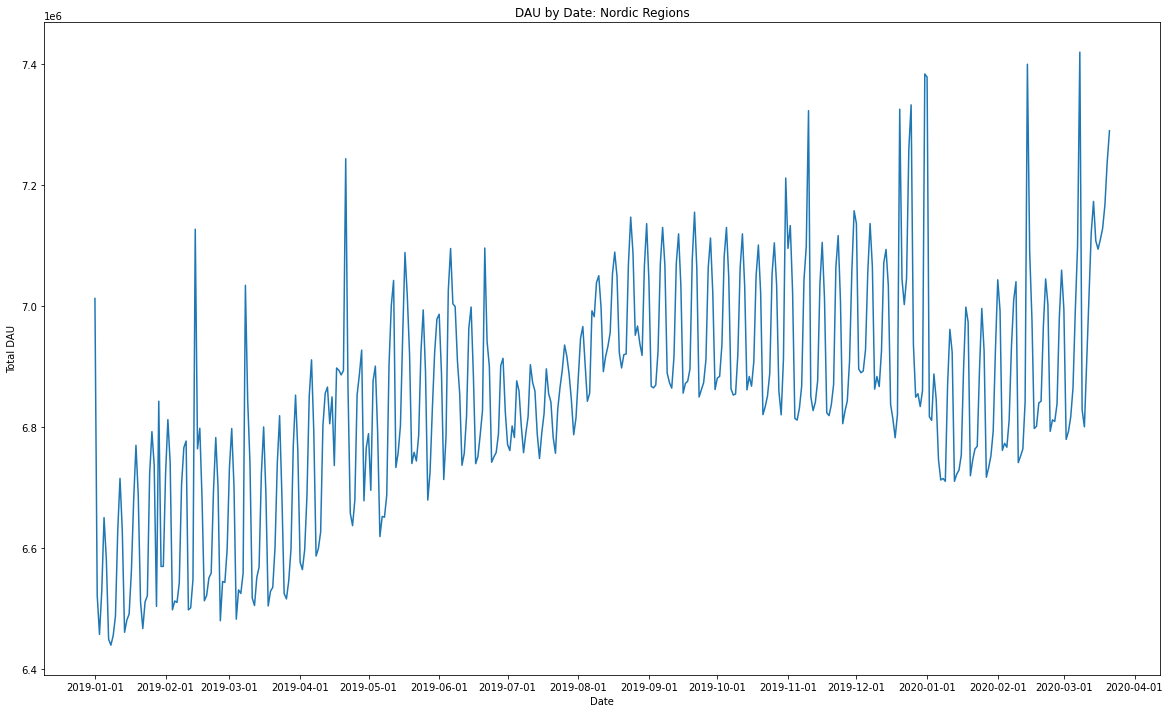

In [ ]:
# Convert "event_date" column to datetime format
snap["event_date"] = pd.to_datetime(snap["event_date"])

# Group data by day and sum DAU column
daily_data = snap.groupby(["event_date"])["APP_APPLICATION_OPEN_UU"].sum()

# Create a time series plot
fig = plt.figure(figsize=(20,12)) # adjust size as needed
plt.plot(daily_data.index, daily_data.values)
plt.xlabel("Date")
plt.ylabel("Total DAU")
plt.title("DAU by Date: Nordic Regions")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

## Question 1
What will the average Q1'2020 DAU be?

To answer this question we will forecast DAU for the remaining days in March than take the average for the whole quarter.

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
daily_data = daily_data.reset_index()

df = daily_data.rename(columns={"event_date": "ds", "APP_APPLICATION_OPEN_UU": "y"})

df.tail()

,index,ds,y
441,441,2020-03-17,7110274
442,442,2020-03-18,7128569
443,443,2020-03-19,7167179
444,444,2020-03-20,7237818
445,445,2020-03-21,7289909


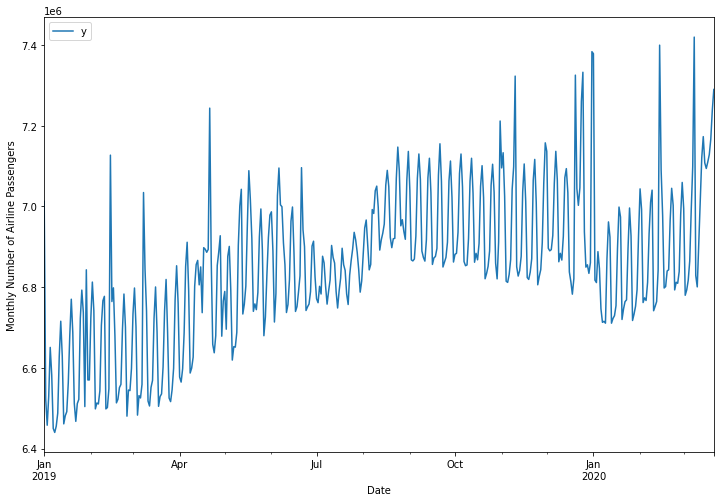

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [ ]:
m = Prophet()

In [ ]:
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgnejnknm/sbh_bq63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgnejnknm/8ycrwddp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20031', 'data', 'file=/tmp/tmpgnejnknm/sbh_bq63.json', 'init=/tmp/tmpgnejnknm/8ycrwddp.json', 'output', 'file=/tmp/tmpgnejnknm/prophet_model0lpd10wh/prophet_model-20230312212215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:22:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:22:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = m.make_future_dataframe(periods=10, freq='D')
future_dates.tail()

,ds
451,2020-03-27
452,2020-03-28
453,2020-03-29
454,2020-03-30
455,2020-03-31


In [ ]:
forecast = m.predict(future_dates)

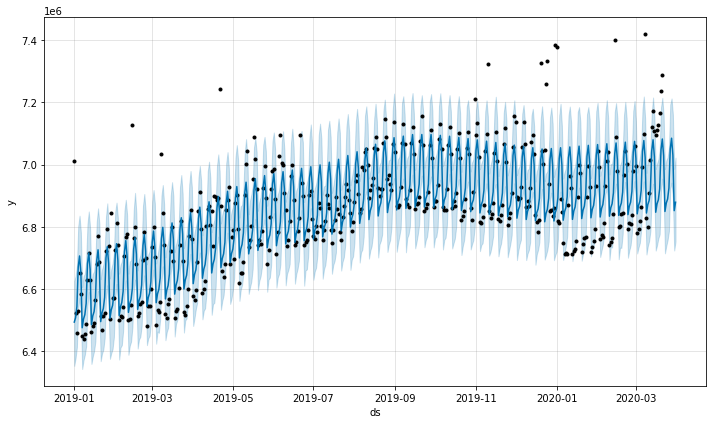

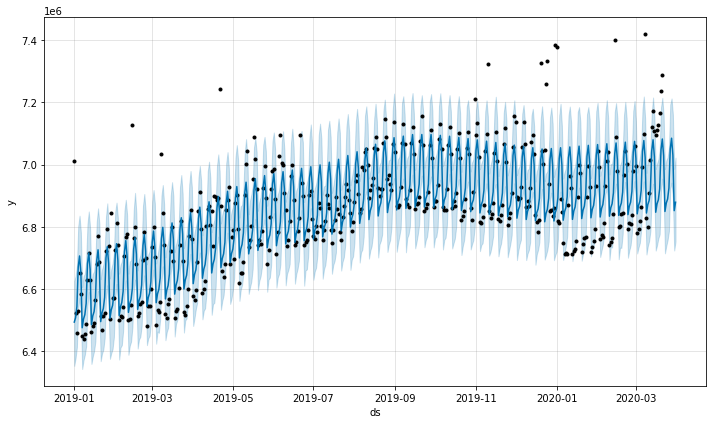

In [ ]:
m.plot(forecast)

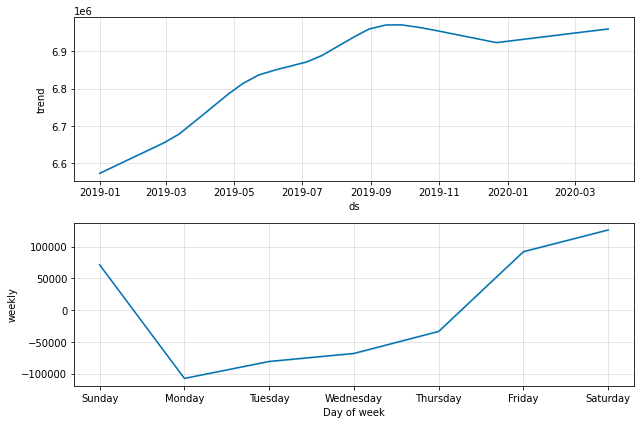

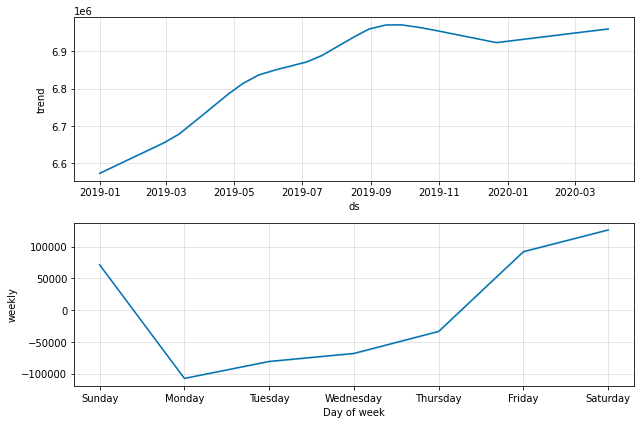

In [ ]:
m.plot_components(forecast)

Tweak forcast to better suite our assumptions:

In [ ]:
daily_data = daily_data.reset_index()

df = daily_data.rename(columns={"event_date": "ds", "APP_APPLICATION_OPEN_UU": "y"})

df.tail()

,index,ds,y
441,441,2020-03-17,7110274
442,442,2020-03-18,7128569
443,443,2020-03-19,7167179
444,444,2020-03-20,7237818
445,445,2020-03-21,7289909


In [ ]:
pro_change = Prophet(n_changepoints=10, yearly_seasonality=True, changepoint_prior_scale=.05)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgnejnknm/rq0k__pl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgnejnknm/ezaugjg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30688', 'data', 'file=/tmp/tmpgnejnknm/rq0k__pl.json', 'init=/tmp/tmpgnejnknm/ezaugjg9.json', 'output', 'file=/tmp/tmpgnejnknm/prophet_modelulhqnaxv/prophet_model-20230312214907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


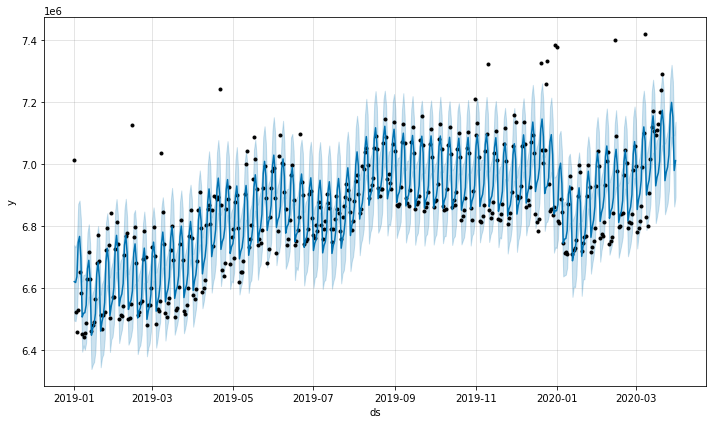

In [ ]:
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);

In [ ]:
# Select rows where "event_date" is greater than or equal to 2020-01-01
quarter1 = forecast[forecast["ds"] >= "2020-01-01"]

In [ ]:
# Calculate the average of a column
column_average = quarter1["yhat"].mean()

# Print the average to the console
print("The forecasted average DAU Q1 2020 is:", column_average)

The forecasted average DAU Q1 2020 is: 6931438.606283497


Average DAU so far in Q1 2020

In [ ]:
q1_so_far = daily_data[daily_data["event_date"] >= "2020-01-01"]
average = q1_so_far["APP_APPLICATION_OPEN_UU"].mean()
print("The average DAU Q1 2020 SO FAR is:", average)

The average DAU Q1 2020 SO FAR is: 6912932.407407408


## Question 2
What range will you forecast for average Q2'2020 DAU?

In [32]:
# Convert the 'event_date' column to a datetime object
snap['event_date'] = pd.to_datetime(snap['event_date'])

In [33]:
# DAU
grouped_dau_data = snap.groupby('event_date')['APP_APPLICATION_OPEN_UU'].sum()

df = grouped_dau_data.reset_index()

# rename the second column
df = df.rename(columns={'APP_APPLICATION_OPEN_UU': 'usage'})
df = df.rename(columns={'event_date': 'date'})

# Rename columns to required format
df = df.rename(columns={'date': 'ds', 'usage': 'y'})

df

,ds,y
0,2019-01-01,7012787
1,2019-01-02,6522305
2,2019-01-03,6457837
3,2019-01-04,6529505
4,2019-01-05,6650731
...,...,...
441,2020-03-17,7110274
442,2020-03-18,7128569
443,2020-03-19,7167179
444,2020-03-20,7237818


In [34]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

,holiday,ds,lower_window,ds_upper,upper_window
0,lockdown_1,2020-03-21,0,2020-06-06,77


In [51]:
m2 = Prophet(holidays=lockdowns, n_changepoints= 8, yearly_seasonality=True, changepoint_prior_scale=.01)
m2 = m2.fit(df)
future2 = m2.make_future_dataframe(periods=101, freq='D')
forecast2 = m2.predict(future2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu11t5vf4/hz9rg3f0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu11t5vf4/n89ogrhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24955', 'data', 'file=/tmp/tmpu11t5vf4/hz9rg3f0.json', 'init=/tmp/tmpu11t5vf4/n89ogrhq.json', 'output', 'file=/tmp/tmpu11t5vf4/prophet_modelim60hrco/prophet_model-20230314034632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:46:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:46:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
03:46:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error duri

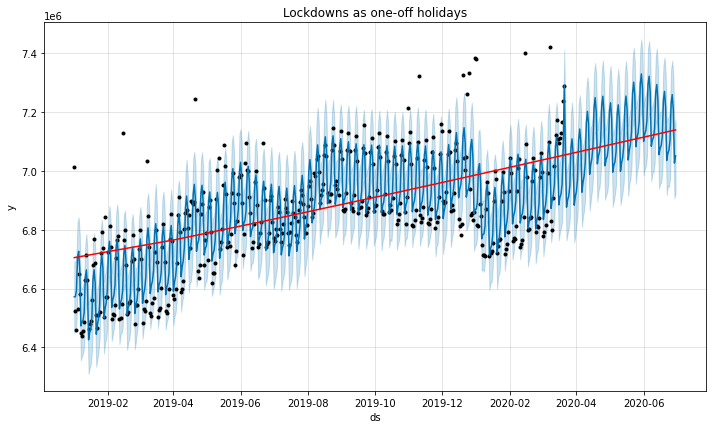

In [52]:
# Plot the forecast
fig = m2.plot(forecast2)
plt.title('Lockdowns as one-off holidays');
a = add_changepoints_to_plot(fig.gca(), m2, forecast2)

In [53]:
# Select Q2 rows
quarter2 = forecast2[forecast2["ds"] >= "2020-04-01"]

In [54]:
# Calculate the average of a column
column_average = quarter2["yhat"].mean()

# Calc avg lower bound
lwr_bnd = quarter2['yhat_lower'].mean()

# Calc avg upper bound
upper_bnd = quarter2['yhat_upper'].mean()

# Print the average to the console
print("The forecasted average DAU Q2 2020 is:", column_average)
print("The forecasted lower bound for DAU Q2 2020 is:", lwr_bnd)
print("The forecasted upper bound for DAU Q2 2020 is:", upper_bnd)

The forecasted average DAU Q2 2020 is: 7131935.744129156
The forecasted lower bound for DAU Q2 2020 is: 7013728.548110898
The forecasted upper bound for DAU Q2 2020 is: 7251202.272471924


## Question 3
In what ways is COVID impacting engagement on Snapchat?

We think COVID would increase the amount of people engaging with Snapchat, due to lockdown and stay-at-home policies. Therefore, unique snap creator numbers will also increse steadly.

We also think there will be a initial upward trends for the next few months, but also suspsect users may get bored and care less about what their friends are up to.

In [55]:
# SNAP CREATE
grouped_snap_create_data = snap.groupby('event_date')['DIRECT_SNAP_CREATE_UU'].sum()

df = grouped_snap_create_data.reset_index()

# rename the second column
df = df.rename(columns={'DIRECT_SNAP_CREATE_UU': 'usage'})
df = df.rename(columns={'event_date': 'date'})
df

,date,usage
0,2019-01-01,4258056
1,2019-01-02,4228556
2,2019-01-03,4225903
3,2019-01-04,4373786
4,2019-01-05,4529193
...,...,...
441,2020-03-17,4832797
442,2020-03-18,4872187
443,2020-03-19,4946252
444,2020-03-20,5093921


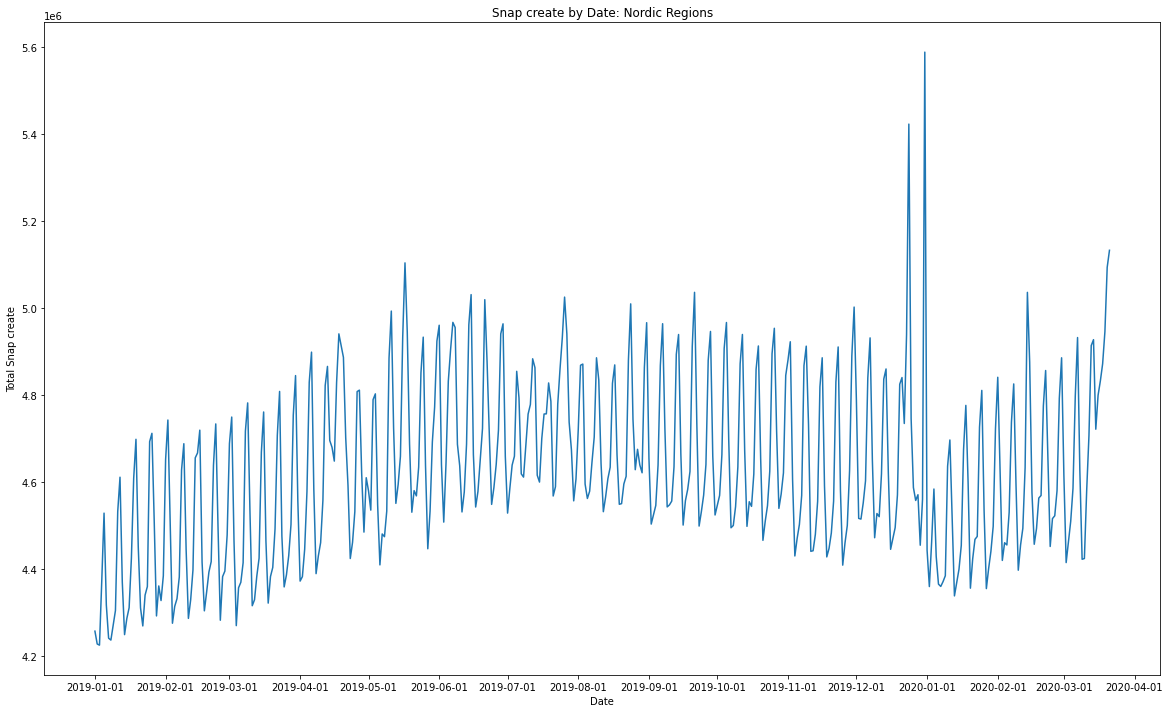

In [56]:
# Group data by day and sum DIRECT_SNAP_CREATE column
daily_data = grouped_snap_create_data
# Create a time series plot
fig = plt.figure(figsize=(20,12)) # adjust size as needed
plt.plot(daily_data.index, daily_data.values)
plt.xlabel("Date")
plt.ylabel("Total Snap create")
plt.title("Snap create by Date: Nordic Regions")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu11t5vf4/biyryh26.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu11t5vf4/voosa1oi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73551', 'data', 'file=/tmp/tmpu11t5vf4/biyryh26.json', 'init=/tmp/tmpu11t5vf4/voosa1oi.json', 'output', 'file=/tmp/tmpu11t5vf4/prophet_modelmnkvyuyb/prophet_model-20230314035201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:52:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:52:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


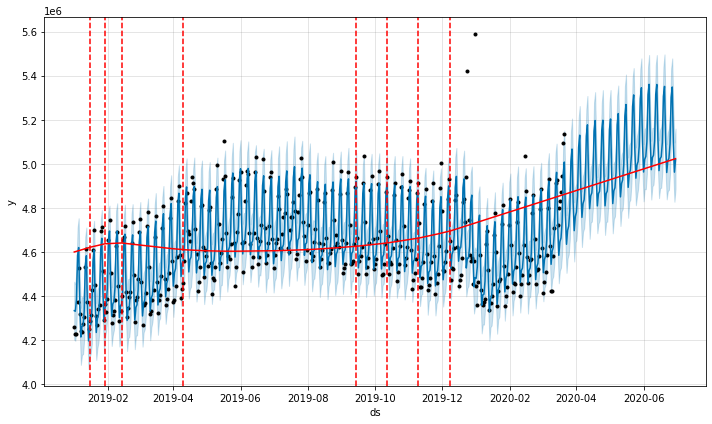

In [57]:
from prophet.plot import add_changepoints_to_plot

# Rename columns to required format
df = df.rename(columns={'date': 'ds', 'usage': 'y'})

# Create a Prophet model and fit the data
m = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.1)
m.fit(df)

# Create future dataframe with 101 days of daily frequency
future = m.make_future_dataframe(periods=101, freq='D')

# Make predictions on the future data
forecast = m.predict(future)

# Plot the forecast
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [58]:
m2 = Prophet(holidays=lockdowns, n_changepoints= 8, yearly_seasonality=True, changepoint_prior_scale=.1)
m2 = m2.fit(df)
future2 = m2.make_future_dataframe(periods=101, freq='D')
forecast2 = m2.predict(future2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu11t5vf4/iq5dwik0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu11t5vf4/pfab6hja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50980', 'data', 'file=/tmp/tmpu11t5vf4/iq5dwik0.json', 'init=/tmp/tmpu11t5vf4/pfab6hja.json', 'output', 'file=/tmp/tmpu11t5vf4/prophet_model5aiztr5c/prophet_model-20230314035216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:52:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:52:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


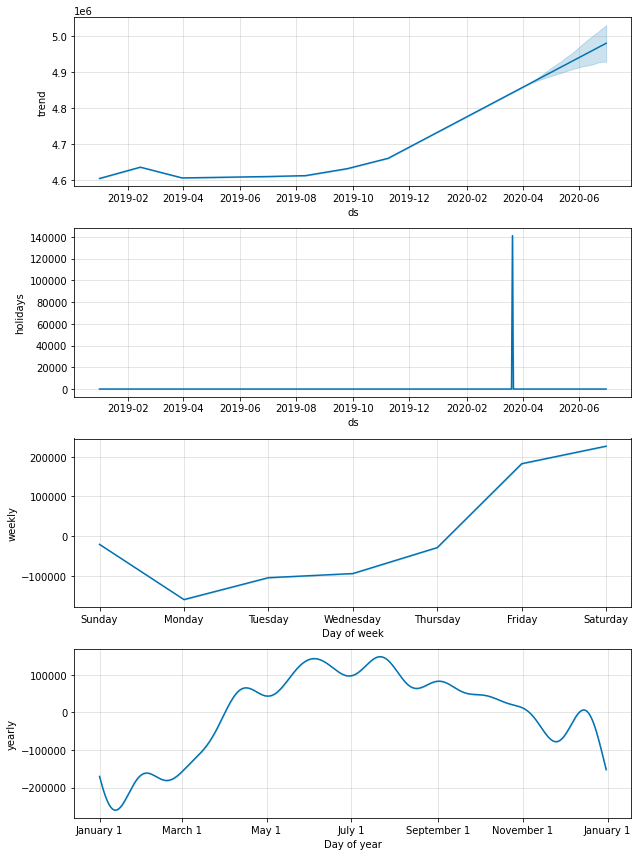

In [59]:
m2.plot_components(forecast2);